In [2]:
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [4]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [5]:
path = 'datas\household_power_consumption.txt' ## 全部数据
path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') 

准确率: 0.485065781751


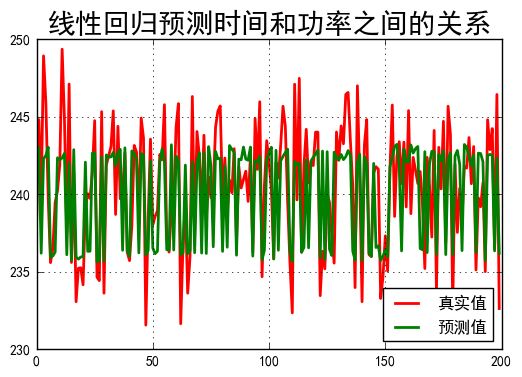

In [7]:
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]


X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


ss = StandardScaler()
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test) 

lr = LinearRegression()
lr.fit(X_train, Y_train) 


y_predict = lr.predict(X_test) 


print ("准确率:",lr.score(X_test, Y_test))


t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

In [11]:
# models = [
#     Pipeline([
#             ('Poly', PolynomialFeatures()),
#             ('Linear', LinearRegression(fit_intercept=False))
#         ])
# ]
# model = models[0]

# X = datas[names[0:2]]
# X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
# Y = datas[names[4]]

# X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train) 
# X_test = ss.transform(X_test) 

In [14]:
# t=np.arange(len(X_test))
# N = 5
# d_pool = np.arange(1,N,1) 
# m = d_pool.size
# clrs = [] 

In [18]:
# t=np.arange(len(X_test))
# N = 5
# d_pool = np.arange(1,N,1) 
# m = d_pool.size
# clrs = [] 
# for c in np.linspace(16711680, 255, m):
#     c=c.astype(int)
#     clrs.append('#%06x' % c)
# line_width = 3

1阶，系数为： [  2.39926650e+02   0.00000000e+00  -4.44089210e-16   3.97781449e+00
   8.73334650e-01   1.70647992e-01   0.00000000e+00]
2阶，系数为： [  1.23998300e+02   2.84217094e-14  -4.26325641e-14   5.34497071e+01
   2.95068077e+00   2.69407641e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.02461452e+02  -2.50100464e+01
  -5.18469319e-01   0.00000000e+00  -1.02427364e+01  -4.65982219e-01
   0.00000000e+00  -3.55472266e-02   0.00000000e+00   0.00000000e+00]
3阶，系数为： [ -1.61841720e+12   8.79049206e+11   4.10575762e+11  -1.69273925e+13
   9.98159528e+12   1.70085773e+12   5.51524623e+11  -1.67271545e+11
   5.99797057e+11  -8.54563290e+11   2.42238075e+11   2.01339672e+11
   4.43332967e+11  -9.55798583e+10   5.98265956e+10  -2.75746621e+11
   1.48866179e+11   7.81250000e-03   8.70184763e+12  -4.02195096e+12
  -6.85337984e+11   0.000

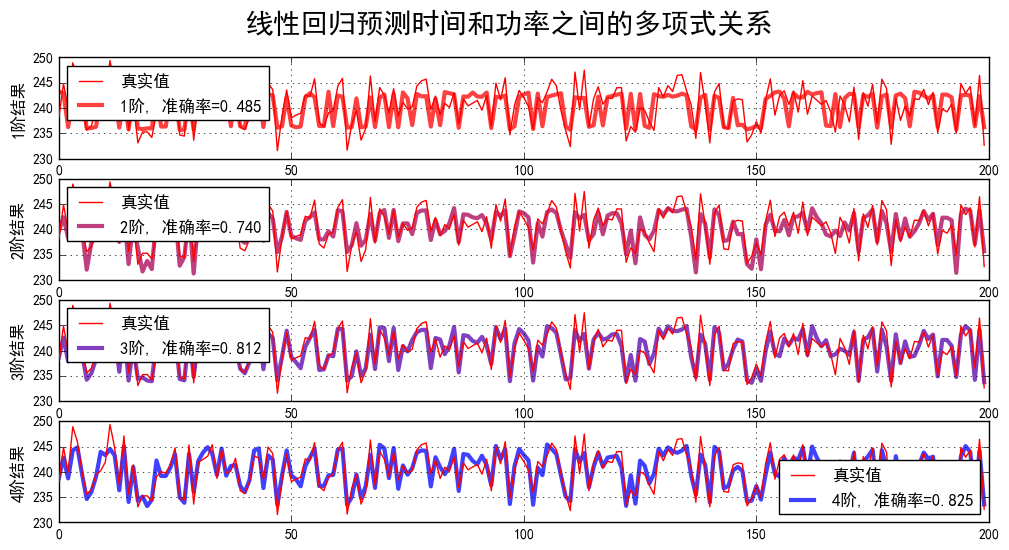

In [19]:
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression(fit_intercept=False))
        ])
]
model = models[0]

X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

X_train,X_test,Y_train,Y_test = 支持下444444444444444444(X, Y, test_size=0.2, random_state=0)


ss = StandardScaler()
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test) 


t=np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1) 
m = d_pool.size
clrs = [] 
for c in np.linspace(16711680, 255, m):
    c=c.astype(int)
    clrs.append('#%06x' % c)
line_width = 3

plt.figure(figsize=(12,6), facecolor='w')
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    model.set_params(Poly__degree=d) 
    model.fit(X_train, Y_train)
    lin = model.get_params('Linear')['Linear']
    output = u'%d阶，系数为：' % d
    print (output, lin.coef_.ravel())
    
    y_hat = model.predict(X_test)
    s = model.score(X_test, Y_test)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)


plt.legend(loc = 'lower right')
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()